# Exploratory Data Analysis
CW1 — Regression prediction challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pathlib import Path
import os

def find_project_root() -> Path:
    """
    Resolve CW1 project root robustly.
    Priority:
    1) CW1_PROJECT_ROOT env var (if set)
    2) Current working directory, then each parent directory
    Root is identified by presence of both required data files.
    """
    candidates = []

    env_root = os.environ.get("CW1_PROJECT_ROOT")
    if env_root:
        candidates.append(Path(env_root).expanduser().resolve())

    cwd = Path.cwd().resolve()
    candidates.extend([cwd, *cwd.parents])

    checked = []
    for root in candidates:
        checked.append(root)
        train_path = root / "data" / "CW1_train.csv"
        test_path = root / "data" / "CW1_test.csv"
        if train_path.is_file() and test_path.is_file():
            return root

    checked_msg = "\n".join(f"  - {p}" for p in checked)
    raise FileNotFoundError(
        "Could not locate CW1 project root.\n"
        "Expected files:\n"
        "  - data/CW1_train.csv\n"
        "  - data/CW1_test.csv\n"
        f"Current working directory: {cwd}\n"
        "Directories checked:\n"
        f"{checked_msg}\n"
        "If needed, set CW1_PROJECT_ROOT to your repo root and rerun this cell."
    )

PROJECT_ROOT = find_project_root()
DATA_DIR = PROJECT_ROOT / "data"
OUTPUT_DIR = PROJECT_ROOT / "outputs"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

def require_file(path: Path, label: str = "Required file") -> Path:
    if not path.is_file():
        raise FileNotFoundError(
            f"{label} not found: {path}\n"
            f"PROJECT_ROOT resolved to: {PROJECT_ROOT}\n"
            "Check file names and repository structure."
        )
    return path

print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"DATA_DIR: {DATA_DIR}")
print(f"OUTPUT_DIR: {OUTPUT_DIR}")

sns.set_style('whitegrid')


PROJECT_ROOT: /Users/frida/Documents/Development/ML-CW1
DATA_DIR: /Users/frida/Documents/Development/ML-CW1/data
OUTPUT_DIR: /Users/frida/Documents/Development/ML-CW1/outputs


## 1. Load Data & Basic Overview

In [2]:
trn = pd.read_csv(require_file(DATA_DIR / 'CW1_train.csv', 'Training CSV'))
tst = pd.read_csv(require_file(DATA_DIR / 'CW1_test.csv', 'Test CSV'))

print(f"Train: {trn.shape}, Test: {tst.shape}")
print(f"\nMissing values: {trn.isnull().sum().sum()}")
print(f"\nDtypes:\n{trn.dtypes}")

Train: (10000, 31), Test: (1000, 30)

Missing values: 0

Dtypes:
outcome    float64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
a1         float64
a2         float64
a3         float64
a4         float64
a5         float64
b1         float64
b2         float64
b3         float64
b4         float64
b5         float64
a6         float64
a7         float64
a8         float64
a9         float64
a10        float64
b6         float64
b7         float64
b8         float64
b9         float64
b10        float64
dtype: object


In [3]:
trn.describe().round(3)

,outcome,carat,depth,table,price,x,y,z,a1,a2,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,...,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,-4.979,0.798,61.748,57.467,3910.842,5.734,5.742,3.541,0.502,0.508,...,-0.012,-0.010,-0.022,-0.009,-0.013,-0.007,-0.003,-0.015,0.000,-0.009
std,12.722,0.472,1.430,2.247,3940.370,1.115,1.228,0.693,0.291,0.291,...,1.000,1.001,1.011,1.010,1.004,0.997,0.992,0.991,1.006,1.005
min,-44.879,0.200,50.800,44.000,326.000,0.000,0.000,0.000,0.000,0.000,...,-3.751,-3.701,-3.811,-3.549,-3.532,-3.740,-3.988,-4.245,-3.649,-3.862
25%,-13.990,0.400,61.000,56.000,965.000,4.730,4.740,2.920,0.250,0.251,...,-0.673,-0.697,-0.697,-0.674,-0.681,-0.687,-0.666,-0.678,-0.668,-0.681
50%,-5.443,0.710,61.900,57.000,2441.000,5.700,5.720,3.530,0.502,0.510,...,-0.013,0.000,-0.005,-0.010,-0.017,0.002,0.023,-0.010,-0.010,-0.016
75%,3.919,1.040,62.500,59.000,5226.000,6.530,6.530,4.030,0.753,0.765,...,0.641,0.673,0.645,0.669,0.671,0.659,0.655,0.653,0.685,0.657
max,39.676,4.000,70.500,73.000,18791.000,10.010,58.900,8.060,1.000,1.000,...,3.601,3.593,4.243,3.715,4.136,4.013,3.813,3.997,3.808,3.471


## 2. Target Distribution

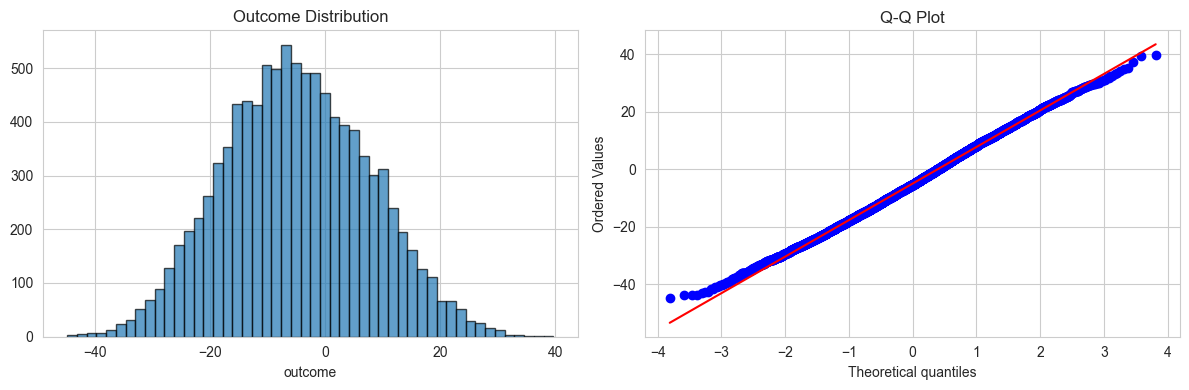

count    10000.000
mean        -4.979
std         12.722
min        -44.879
25%        -13.990
50%         -5.443
75%          3.919
max         39.676
Name: outcome, dtype: float64


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(trn['outcome'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Outcome Distribution')
axes[0].set_xlabel('outcome')
stats.probplot(trn['outcome'], plot=axes[1])
axes[1].set_title('Q-Q Plot')
plt.tight_layout()
plt.show()

print(trn['outcome'].describe().round(3))

## 3. Correlations with Outcome

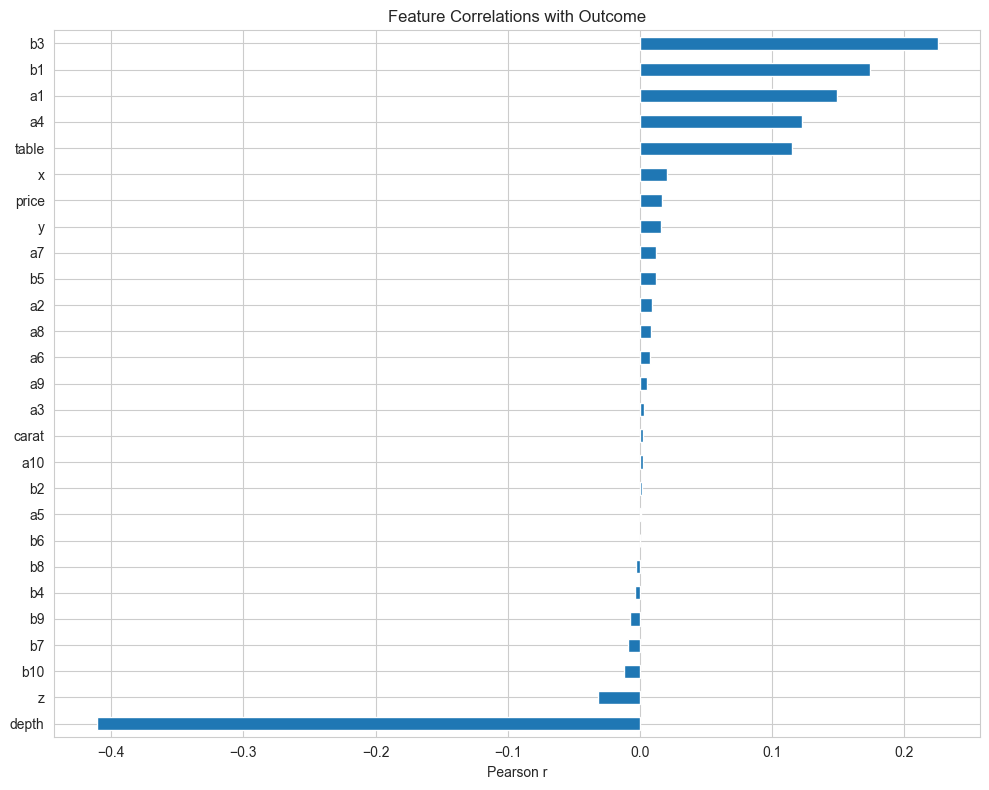

depth   -0.4111
b3       0.2254
b1       0.1737
a1       0.1491
a4       0.1224
table    0.1150
z       -0.0315
x        0.0204
price    0.0170
y        0.0159
a7       0.0125
b5       0.0124
b10     -0.0120
b7      -0.0092
a2       0.0088
a8       0.0080
b9      -0.0073
a6       0.0072
a9       0.0054
b4      -0.0038
a3       0.0031
b8      -0.0026
carat    0.0025
a10      0.0025
b2       0.0016
a5       0.0007
b6       0.0001
Name: outcome, dtype: float64


In [5]:
numeric_cols = trn.select_dtypes(include=[np.number]).columns
corr_with_outcome = trn[numeric_cols].corr()['outcome'].drop('outcome').sort_values(key=abs, ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
corr_with_outcome.sort_values().plot.barh(ax=ax)
ax.set_title('Feature Correlations with Outcome')
ax.set_xlabel('Pearson r')
plt.tight_layout()
plt.show()

print(corr_with_outcome.round(4))

## 4. Full Correlation Heatmap

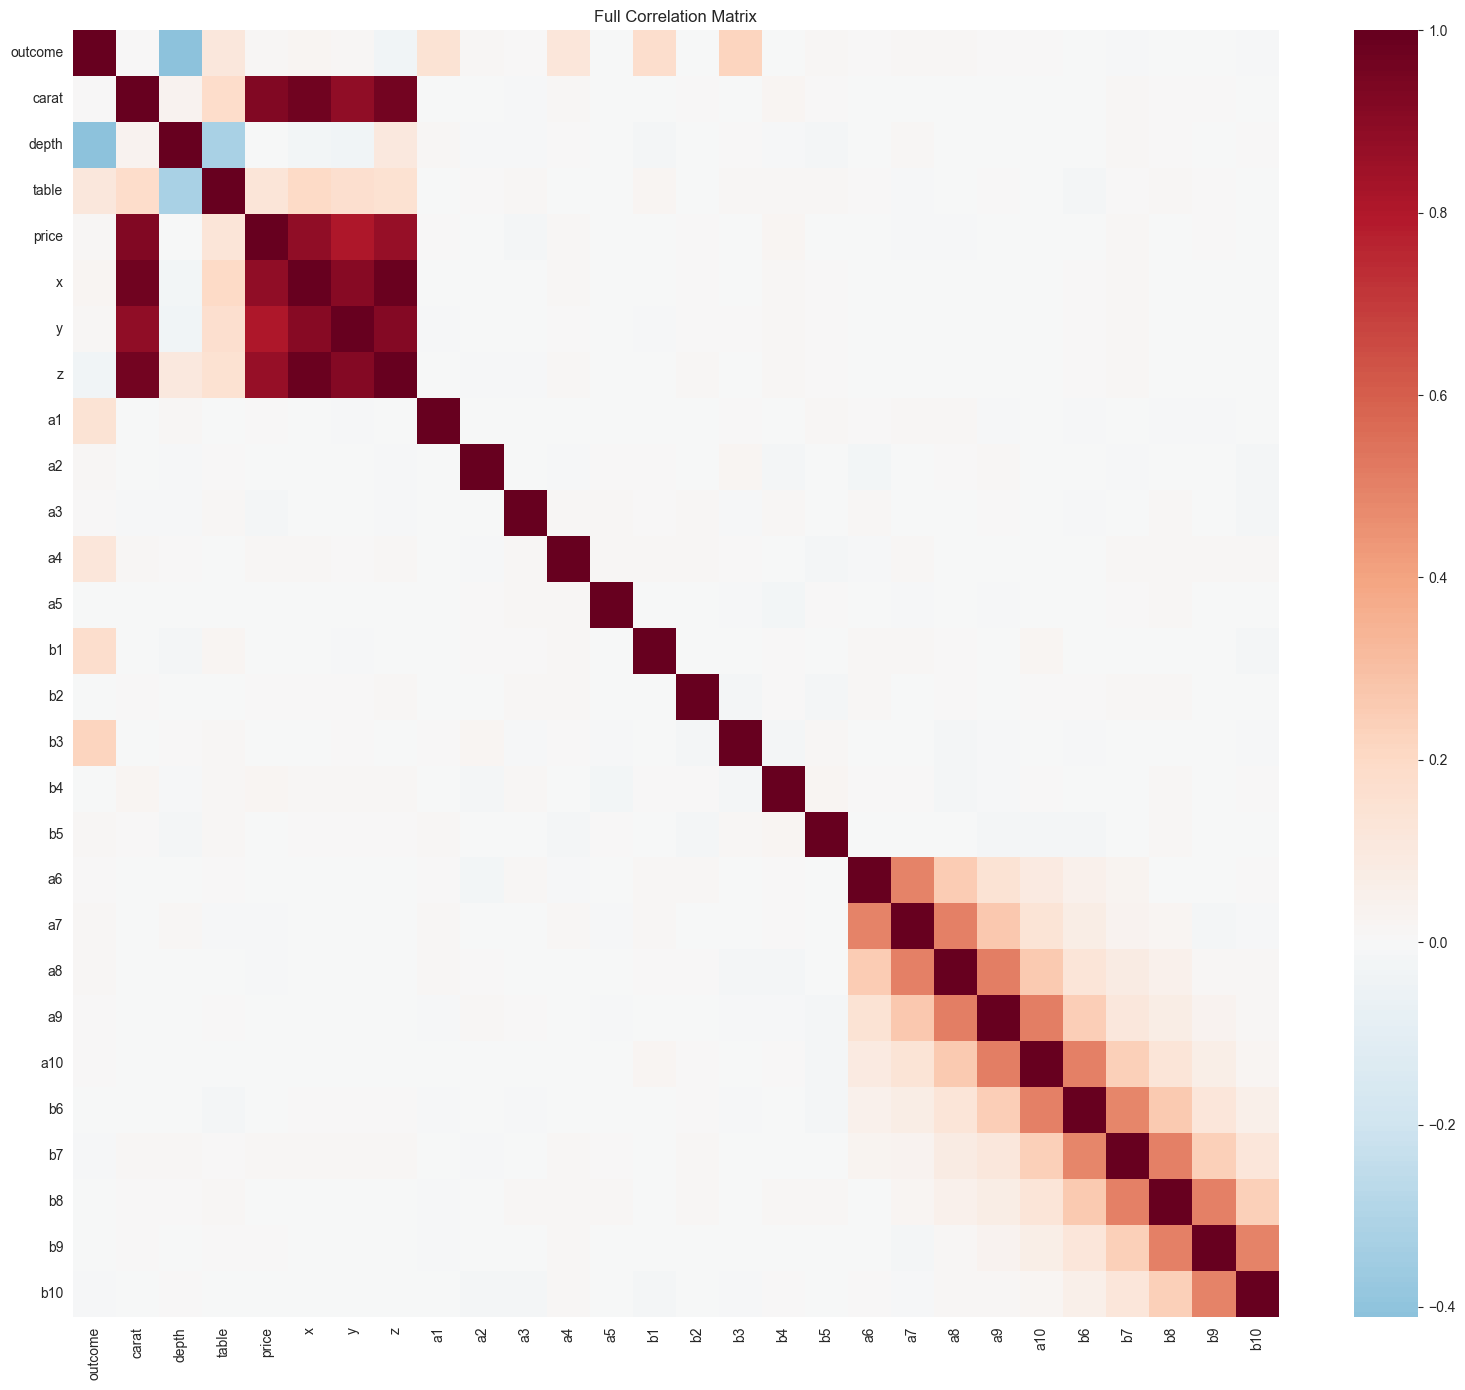

In [6]:
fig, ax = plt.subplots(figsize=(16, 14))
corr_matrix = trn[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0, ax=ax)
ax.set_title('Full Correlation Matrix')
plt.tight_layout()
plt.show()

## 5. Categorical Features vs Outcome

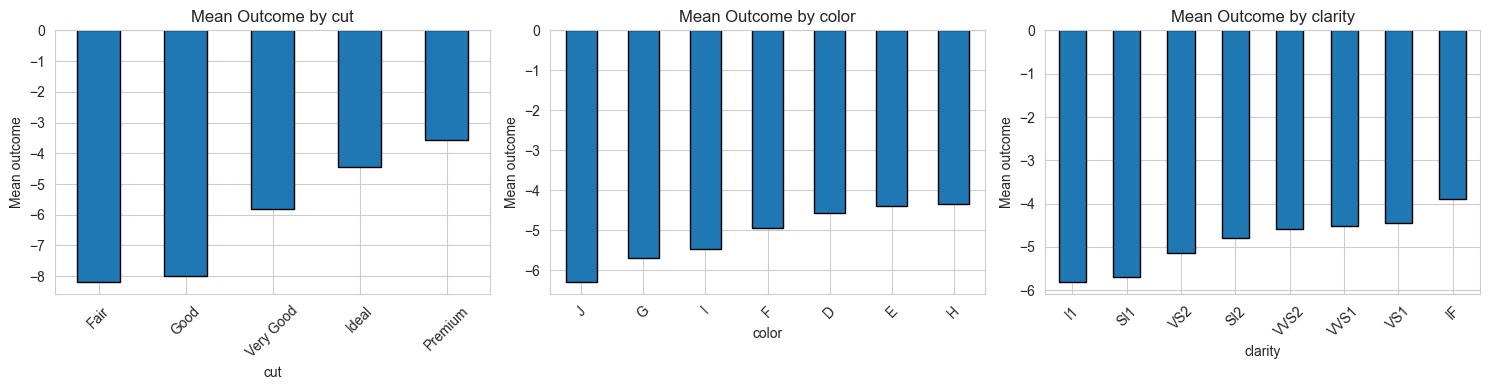


cut:
cut
Ideal        4040
Premium      2439
Very Good    2296
Good          925
Fair          300
Name: count, dtype: int64

color:
color
G    2120
E    1873
F    1746
H    1506
D    1246
I     983
J     526
Name: count, dtype: int64

clarity:
clarity
SI1     2408
VS2     2256
SI2     1743
VS1     1503
VVS2     951
VVS1     675
IF       318
I1       146
Name: count, dtype: int64


In [7]:
cat_cols = ['cut', 'color', 'clarity']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(cat_cols):
    trn.groupby(col)['outcome'].mean().sort_values().plot.bar(ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Mean Outcome by {col}')
    axes[i].set_ylabel('Mean outcome')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

for col in cat_cols:
    print(f"\n{col}:\n{trn[col].value_counts()}")

## 6. a/b Feature Analysis

=== Feature Group Correlations with Outcome ===
Diamond features: 0.0876 (mean |r|)
a features:       0.0320 (mean |r|)
b features:       0.0448 (mean |r|)


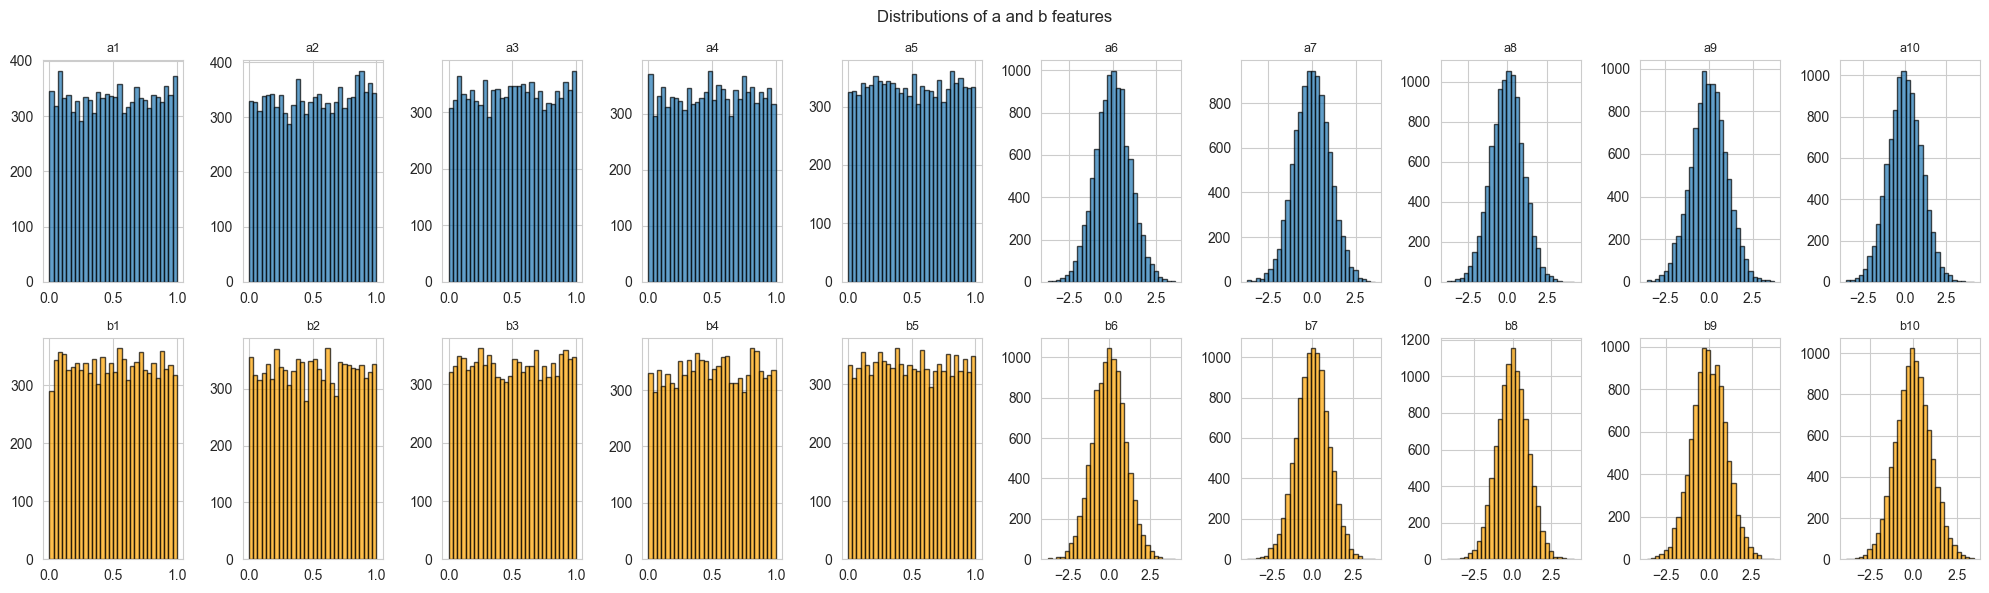

In [8]:
a_cols = [f'a{i}' for i in range(1, 11)]
b_cols = [f'b{i}' for i in range(1, 11)]
diamond_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

print("=== Feature Group Correlations with Outcome ===")
print(f"Diamond features: {corr_with_outcome[diamond_cols].abs().mean():.4f} (mean |r|)")
print(f"a features:       {corr_with_outcome[a_cols].abs().mean():.4f} (mean |r|)")
print(f"b features:       {corr_with_outcome[b_cols].abs().mean():.4f} (mean |r|)")

fig, axes = plt.subplots(2, 10, figsize=(20, 6))
for i, col in enumerate(a_cols):
    axes[0, i].hist(trn[col], bins=30, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(col, fontsize=9)
for i, col in enumerate(b_cols):
    axes[1, i].hist(trn[col], bins=30, alpha=0.7, edgecolor='black', color='orange')
    axes[1, i].set_title(col, fontsize=9)
plt.suptitle('Distributions of a and b features')
plt.tight_layout()
plt.show()

## 7. Top Features vs Outcome (Scatter)

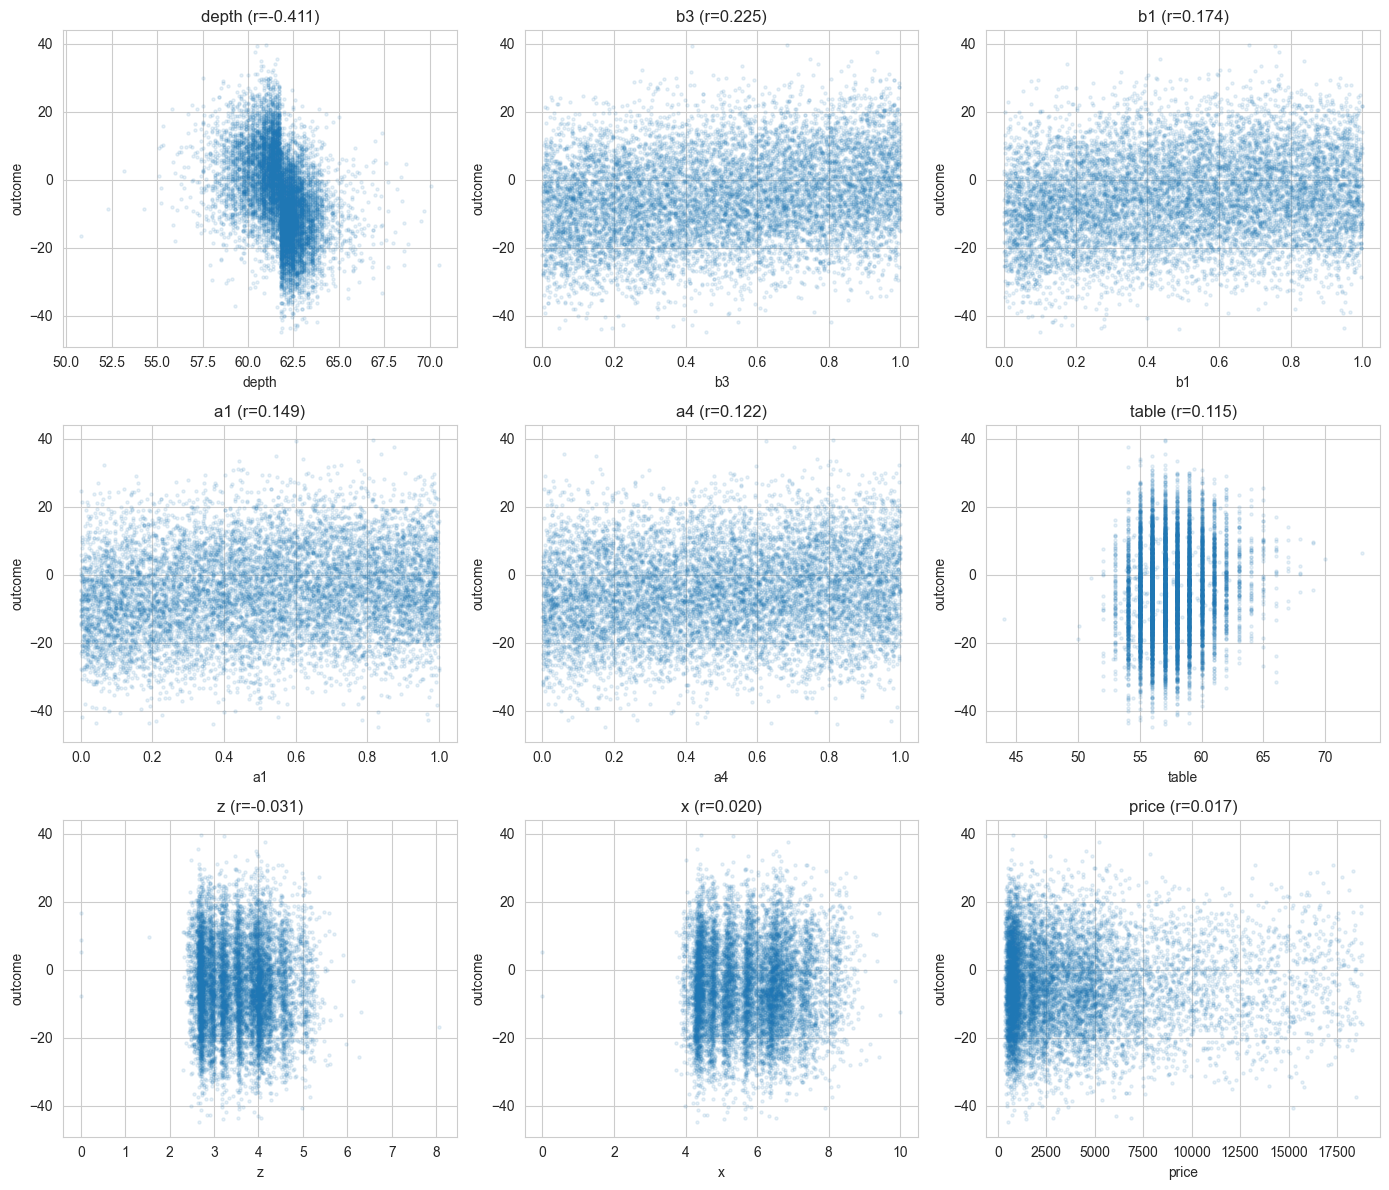

In [9]:
top_features = corr_with_outcome.abs().nlargest(9).index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(14, 12))
for i, col in enumerate(top_features):
    ax = axes[i // 3, i % 3]
    ax.scatter(trn[col], trn['outcome'], alpha=0.1, s=5)
    ax.set_xlabel(col)
    ax.set_ylabel('outcome')
    ax.set_title(f'{col} (r={corr_with_outcome[col]:.3f})')
plt.tight_layout()
plt.show()

## 8. Multicollinearity Check (Diamond Features)

In [10]:
diamond_corr = trn[diamond_cols].corr()
print(diamond_corr.round(3))

       carat  depth  table  price      x      y      z
carat  1.000  0.033  0.181  0.921  0.972  0.886  0.967
depth  0.033  1.000 -0.318 -0.007 -0.022 -0.031  0.102
table  0.181 -0.318  1.000  0.130  0.196  0.170  0.152
price  0.921 -0.007  0.130  1.000  0.882  0.805  0.873
x      0.972 -0.022  0.196  0.882  1.000  0.909  0.986
y      0.886 -0.031  0.170  0.805  0.909  1.000  0.915
z      0.967  0.102  0.152  0.873  0.986  0.915  1.000


## 9. Outlier Check

In [11]:
print("=== Potential Outliers (values > 4 std from mean) ===")
for col in numeric_cols:
    if col == 'outcome':
        continue
    z_scores = np.abs((trn[col] - trn[col].mean()) / trn[col].std())
    n_outliers = (z_scores > 4).sum()
    if n_outliers > 0:
        print(f"  {col}: {n_outliers} outliers")

print("\n=== Train vs Test Distribution Check ===")
drift_cols = []
for col in numeric_cols.drop('outcome'):
    train_mean, test_mean = trn[col].mean(), tst[col].mean()
    train_std = trn[col].std()
    if abs(train_mean - test_mean) > 0.5 * train_std:
        drift_cols.append(col)
        print(f"  {col}: train mean={train_mean:.3f}, test mean={test_mean:.3f} (possible drift)")

if not drift_cols:
    print("\nNo distribution drift detected.")

=== Potential Outliers (values > 4 std from mean) ===
  carat: 14 outliers
  depth: 36 outliers
  table: 19 outliers
  x: 2 outliers
  y: 3 outliers
  z: 5 outliers
  a8: 1 outliers
  a10: 1 outliers
  b6: 1 outliers
  b7: 1 outliers
  b8: 2 outliers

=== Train vs Test Distribution Check ===

No distribution drift detected.
